In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings('ignore')


# set up formatting for x axis time values
monthfmt = DateFormatter("%b")
yearfmt = DateFormatter("%Y")

def combinedfmt(x,pos):
    string = monthfmt(x)
    if string == "Jan":
        string += "\n" + yearfmt(x)
    return string

def format_date_ax(ax):
    ax.xaxis.set_major_locator(MonthLocator((1,4,7,10)))
    ax.xaxis.set_major_formatter(FuncFormatter(combinedfmt))
    plt.setp(ax.get_xticklabels(), rotation=0, horizontalalignment='center');
    return None

---

#### Original GOES ABI Brightness Temperature Summary Statistics

In [2]:
# open csv file with summary stats
df_original_tb = pd.read_csv('goes_modis_aster_original_tb_summary_stats.csv')
# set datetime to aster_datetime
df_original_tb['datetime'] = pd.to_datetime(df_original_tb.time.copy())
# uset this as the index
df_original_tb.set_index('datetime', inplace=True)

# add an R-squared column for each diff
df_original_tb['ast_mod_r2_value'] = df_original_tb.ast_mod_r_value.copy()**2
df_original_tb['ast_goes_r2_value'] = df_original_tb.ast_goes_r_value.copy()**2

# filter out anything with Number of Pixels < 45000
df_original_tb = df_original_tb.where(df_original_tb.ast_mod_n >= 45000)

#drop_idx_list = [df_original_tb.index[i] for i in [0, 1, 4, 8, 10, 12, 16, 18, 22, 23, 25, 26, 27, 34, 36, 42, 43]]
#drop_idx_list = [df_original_tb.index[i] for i in [43]]
#df_original_tb.drop(drop_idx_list, inplace=True)

# preview
#df_original_tb.head(1)

In [3]:
df_original_tb

,Unnamed: 0,time,aster_rad_filepath,modis_rad_filepath,goes_rad_filepath,goes_zones_filepath,goes_tb_filepath,ast_mod_n,ast_mod_mean_diff,ast_mod_median_diff,...,ast_subpx_goes_mean_squared_diff,ast_subpx_goes_rms_diff,ast_subpx_goes_std_diff,ast_subpx_goes_slope,ast_subpx_goes_intercept,ast_subpx_goes_r_value,ast_subpx_goes_p_value,ast_subpx_goes_std_err,ast_mod_r2_value,ast_goes_r2_value
datetime,,,,,,,,,,,,,,,,,,,,,
2017-04-21 18:51:07,0.0,2017-04-21 18:51:07,/storage/spestana/ASTER/AST_L1T/geotiff/T/T_ba...,/storage/MODIS/Tuolumne_MOD021KM/MOD021KM.A201...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,46072.0,-0.363261,-0.324419,...,34.071022,5.837039,4.917675,0.315732,191.563552,0.176146,0.000000e+00,0.008220,0.231232,0.070578
2017-05-23 18:51:10,1.0,2017-05-23 18:51:10,/storage/spestana/ASTER/AST_L1T/geotiff/T/T_ba...,/storage/MODIS/Tuolumne_MOD021KM/MOD021KM.A201...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,110485.0,0.173606,-0.008810,...,47.384773,6.883660,6.029857,0.420453,165.524617,0.598459,0.000000e+00,0.001693,0.447842,0.639705
2017-06-07 06:07:10,2.0,2017-06-07 06:07:10,/storage/spestana/ASTER/AST_L1T/geotiff/T/T_ba...,/storage/MODIS/Tuolumne_MOD021KM/MOD021KM.A201...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,77552.0,-0.654649,-0.610624,...,11.828651,3.439281,3.076653,0.551231,124.643212,0.629963,0.000000e+00,0.002440,0.513611,0.611211
2017-06-07 06:07:19,3.0,2017-06-07 06:07:19,/storage/spestana/ASTER/AST_L1T/geotiff/T/T_ba...,/storage/MODIS/Tuolumne_MOD021KM/MOD021KM.A201...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,53858.0,-0.122212,0.025054,...,9.595404,3.097645,3.081222,0.435694,155.013098,0.515953,0.000000e+00,0.003117,0.412476,0.484363
2017-06-16 06:01:08,4.0,2017-06-16 06:01:08,/storage/spestana/ASTER/AST_L1T/geotiff/T/T_ba...,/storage/MODIS/Tuolumne_MOD021KM/MOD021KM.A201...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,108768.0,-0.398329,-0.305095,...,9.420536,3.069289,3.026901,0.284007,198.274757,0.393387,0.000000e+00,0.002013,0.334192,0.267227
2017-09-21 18:45:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-07 06:01:15,6.0,2017-11-07 06:01:15,/storage/spestana/ASTER/AST_L1T/geotiff/T/T_ba...,/storage/MODIS/Tuolumne_MOD021KM/MOD021KM.A201...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,84231.0,-0.112311,-0.017174,...,7.786111,2.790360,2.711826,0.160295,223.441873,0.302313,0.000000e+00,0.001741,0.200391,0.214971
2017-11-30 06:07:13,7.0,2017-11-30 06:07:13,/storage/spestana/ASTER/AST_L1T/geotiff/T/T_ba...,/storage/MODIS/Tuolumne_MOD021KM/MOD021KM.A201...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,77453.0,-0.635240,-0.632135,...,13.248548,3.639856,3.155647,0.434412,152.134505,0.608787,0.000000e+00,0.002034,0.579637,0.575232
2017-11-30 06:07:22,8.0,2017-11-30 06:07:22,/storage/spestana/ASTER/AST_L1T/geotiff/T/T_ba...,/storage/MODIS/Tuolumne_MOD021KM/MOD021KM.A201...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,53732.0,0.008083,-0.093709,...,11.910241,3.451122,3.372070,0.249053,199.598958,0.401347,0.000000e+00,0.002452,0.376149,0.351957


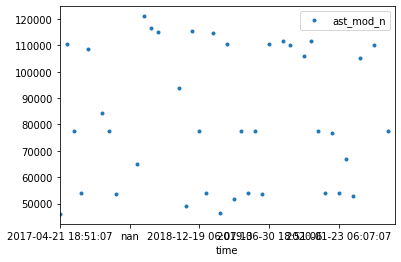

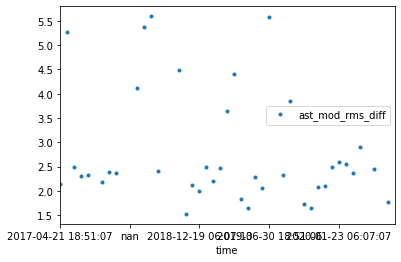

In [4]:
df_original_tb.plot(x='time', y='ast_mod_n', linestyle='none', marker='.')
df_original_tb.plot(x='time', y='ast_mod_rms_diff', linestyle='none', marker='.')
#plt.plot(df_original_tb.ast_subpx_mod_mean_diff)

#### Orthorectified GOES ABI Brightness Temperature Summary Statistics

In [5]:
# open csv file with summary stats
df_ortho_tb = pd.read_csv('goes_modis_aster_orthorectified_tb_summary_stats.csv')
# set datetime to aster_datetime
df_ortho_tb['datetime'] = pd.to_datetime(df_ortho_tb.time.copy())
# uset this as the index
df_ortho_tb.set_index('datetime', inplace=True)

# add an R-squared column for each diff
df_ortho_tb['ast_mod_r2_value'] = df_ortho_tb.ast_mod_r_value.copy()**2
df_ortho_tb['ast_goes_r2_value'] = df_ortho_tb.ast_goes_r_value.copy()**2

# filter out anything with Number of Pixels < 45000
df_ortho_tb = df_ortho_tb.where(df_ortho_tb.ast_mod_n >= 45000)
#df_ortho_tb.drop(drop_idx_list, inplace=True)
# preview
#df_ortho_tb.head(1)

In [6]:
df_ortho_tb

,Unnamed: 0,time,aster_rad_filepath,modis_rad_filepath,goes_rad_filepath,goes_zones_filepath,goes_tb_filepath,ast_mod_n,ast_mod_mean_diff,ast_mod_median_diff,...,ast_subpx_goes_mean_squared_diff,ast_subpx_goes_rms_diff,ast_subpx_goes_std_diff,ast_subpx_goes_slope,ast_subpx_goes_intercept,ast_subpx_goes_r_value,ast_subpx_goes_p_value,ast_subpx_goes_std_err,ast_mod_r2_value,ast_goes_r2_value
datetime,,,,,,,,,,,,,,,,,,,,,
2017-04-21 18:51:07,0.0,2017-04-21 18:51:07,/storage/spestana/ASTER/AST_L1T/geotiff/T/T_ba...,/storage/MODIS/Tuolumne_MOD021KM/MOD021KM.A201...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,46072.0,-0.363261,-0.324419,...,15.000525,3.873051,3.141026,0.399373,167.653648,0.355815,0.000000e+00,0.004887,0.231232,0.282020
2017-05-23 18:51:10,1.0,2017-05-23 18:51:10,/storage/spestana/ASTER/AST_L1T/geotiff/T/T_ba...,/storage/MODIS/Tuolumne_MOD021KM/MOD021KM.A201...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,110485.0,0.173606,-0.008810,...,36.512864,6.042588,5.385573,0.442560,158.757047,0.694749,0.000000e+00,0.001378,0.447842,0.831107
2017-06-07 06:07:10,2.0,2017-06-07 06:07:10,/storage/spestana/ASTER/AST_L1T/geotiff/T/T_ba...,/storage/MODIS/Tuolumne_MOD021KM/MOD021KM.A201...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,77552.0,-0.654649,-0.610624,...,5.625732,2.371863,2.259894,0.669012,91.516745,0.802007,0.000000e+00,0.001789,0.513611,0.951597
2017-06-07 06:07:19,3.0,2017-06-07 06:07:19,/storage/spestana/ASTER/AST_L1T/geotiff/T/T_ba...,/storage/MODIS/Tuolumne_MOD021KM/MOD021KM.A201...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,53858.0,-0.122212,0.025054,...,5.838208,2.416238,2.362967,0.523576,131.108015,0.711065,0.000000e+00,0.002231,0.412476,0.937012
2017-06-16 06:01:08,4.0,2017-06-16 06:01:08,/storage/spestana/ASTER/AST_L1T/geotiff/T/T_ba...,/storage/MODIS/Tuolumne_MOD021KM/MOD021KM.A201...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,108768.0,-0.398329,-0.305095,...,12.606660,3.550586,3.520409,0.113081,245.440456,0.157494,0.000000e+00,0.002150,0.334192,0.048833
2017-09-21 18:45:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-07 06:01:15,6.0,2017-11-07 06:01:15,/storage/spestana/ASTER/AST_L1T/geotiff/T/T_ba...,/storage/MODIS/Tuolumne_MOD021KM/MOD021KM.A201...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,84231.0,-0.112311,-0.017174,...,5.725459,2.392793,2.289565,0.314456,182.578852,0.561513,0.000000e+00,0.001597,0.200391,0.830372
2017-11-30 06:07:13,7.0,2017-11-30 06:07:13,/storage/spestana/ASTER/AST_L1T/geotiff/T/T_ba...,/storage/MODIS/Tuolumne_MOD021KM/MOD021KM.A201...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,77453.0,-0.635240,-0.632135,...,7.346835,2.710505,2.494756,0.562250,117.403851,0.776184,0.000000e+00,0.001641,0.579637,0.931002
2017-11-30 06:07:22,8.0,2017-11-30 06:07:22,/storage/spestana/ASTER/AST_L1T/geotiff/T/T_ba...,/storage/MODIS/Tuolumne_MOD021KM/MOD021KM.A201...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,/storage/GOES/orthorectified/2017/04/21/ABI-L1...,53732.0,0.008083,-0.093709,...,9.138653,3.023020,2.836280,0.377744,165.830889,0.610388,0.000000e+00,0.002115,0.376149,0.886501


---

### Plot Brightness Temperature Summary Stats Together

In [7]:
# Make difference dataframe
df_change_tb = df_ortho_tb.drop(columns=['Unnamed: 0', 'time', 
                                         'aster_rad_filepath', 
                                         'modis_rad_filepath', 
                                         'goes_rad_filepath', 'goes_tb_filepath', 'goes_zones_filepath']) - \
               df_original_tb.drop(columns=['Unnamed: 0', 'time', 
                                         'aster_rad_filepath', 
                                         'modis_rad_filepath', 
                                         'goes_rad_filepath', 'goes_tb_filepath', 'goes_zones_filepath'])

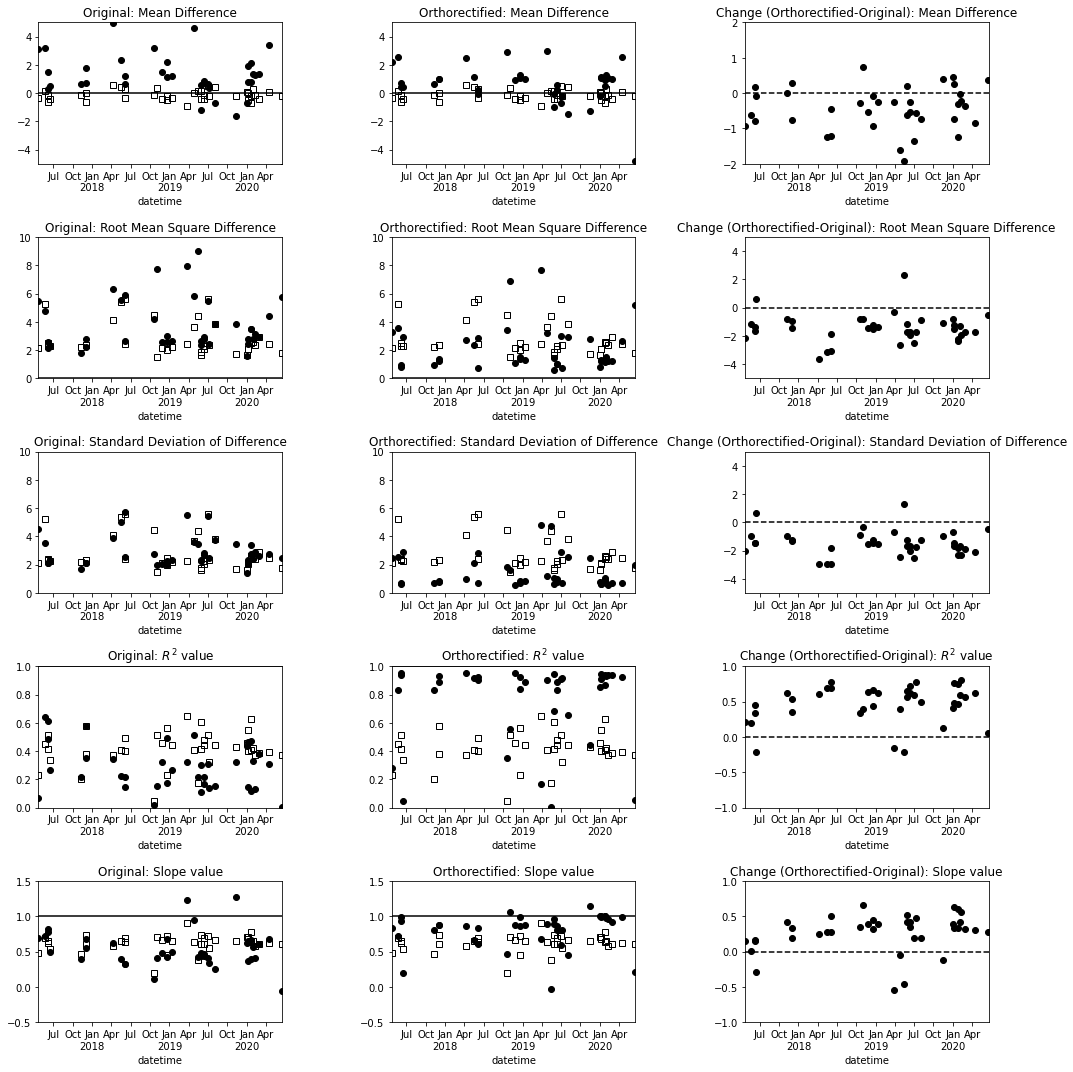

In [8]:
fig, axes = plt.subplots(5,3,figsize=(15,15), tight_layout=True)

ax = axes.flatten()

### Original stats

df_original_tb.ast_mod_mean_diff.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[0], label='MODIS - ASTER')
df_original_tb.ast_goes_mean_diff.plot(linestyle='none', marker='o',  c='k',  ax=ax[0], label='GOES - ASTER')
#df_original_tb.mod_goes_mean_diff.plot(linestyle='none', marker='+', c='#1b9e77', ax=ax[0], label='GOES - MODIS')
ax[0].set_title('Original: Mean Difference')
ax[0].set_ylim(-5,5)
ax[0].axhline(0,c='k')

df_original_tb.ast_mod_rms_diff.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[3], label='MODIS - ASTER')
df_original_tb.ast_goes_rms_diff.plot(linestyle='none', marker='o',  c='k', ax=ax[3],  label='GOES - ASTER')
#df_original_tb.mod_goes_rms_diff.plot(linestyle='none', marker='+',  c='#1b9e77',ax=ax[3],  label='GOES - MODIS')
ax[3].set_title('Original: Root Mean Square Difference')
ax[3].set_ylim(0,10)
ax[3].axhline(0,c='k')

df_original_tb.ast_mod_std_diff.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[6], label='MODIS - ASTER')
df_original_tb.ast_goes_std_diff.plot(linestyle='none', marker='o',  c='k', ax=ax[6],  label='GOES - ASTER')
#df_original_tb.mod_goes_std_diff.plot(linestyle='none', marker='+',  c='#1b9e77',ax=ax[6],  label='GOES - MODIS')
ax[6].set_title('Original: Standard Deviation of Difference')
ax[6].set_ylim(0,10)

df_original_tb.ast_mod_r2_value.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[9], label='MODIS : ASTER')
df_original_tb.ast_goes_r2_value.plot(linestyle='none', marker='o',  c='k', ax=ax[9],  label='GOES : ASTER')
#df_original_tb.mod_goes_r2_value.plot(linestyle='none', marker='+',  c='#1b9e77',ax=ax[9],  label='GOES : MODIS')
ax[9].set_title('Original: $R^2$ value')
ax[9].set_ylim(0,1)
ax[9].axhline(1,c='k')

df_original_tb.ast_mod_slope.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[12], label='MODIS : ASTER')
df_original_tb.ast_goes_slope.plot(linestyle='none',marker='o',  c='k', ax=ax[12],  label='GOES : ASTER')
#df_original_tb.mod_goes_slope.plot(linestyle='none', marker='+',  c='#1b9e77',ax=ax[12],  label='GOES : MODIS')
ax[12].set_title('Original: Slope value')
ax[12].set_ylim(-0.5,1.5)
ax[12].axhline(1,c='k')

### Orthorectified stats

df_ortho_tb.ast_mod_mean_diff.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[1], label='MODIS - ASTER')
df_ortho_tb.ast_goes_mean_diff.plot(linestyle='none', marker='o',  c='k', ax=ax[1], label='GOES - ASTER')
#df_ortho_tb.mod_goes_mean_diff.plot(linestyle='none', marker='+', c='#1b9e77', ax=ax[1], label='GOES - MODIS')
ax[1].set_title('Orthorectified: Mean Difference')
ax[1].set_ylim(-5,5)
ax[1].axhline(0,c='k')

df_ortho_tb.ast_mod_rms_diff.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[4], label='MODIS - ASTER')
df_ortho_tb.ast_goes_rms_diff.plot(linestyle='none',marker='o',  c='k', ax=ax[4],  label='GOES - ASTER')
#df_ortho_tb.mod_goes_rms_diff.plot(linestyle='none', marker='+',  c='#1b9e77',ax=ax[4],  label='GOES - MODIS')
ax[4].set_title('Orthorectified: Root Mean Square Difference')
ax[4].set_ylim(0,10)
ax[4].axhline(0,c='k')

df_ortho_tb.ast_mod_std_diff.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[7], label='MODIS - ASTER')
df_ortho_tb.ast_goes_std_diff.plot(linestyle='none', marker='o',  c='k', ax=ax[7],  label='GOES - ASTER')
#df_ortho_tb.mod_goes_std_diff.plot(linestyle='none', marker='+',  c='#1b9e77',ax=ax[7],  label='GOES - MODIS')
ax[7].set_title('Orthorectified: Standard Deviation of Difference')
ax[7].set_ylim(0,10)

df_ortho_tb.ast_mod_r2_value.plot(linestyle='none',marker='s',  mfc='none', mec='k', ax=ax[10], label='MODIS : ASTER')
df_ortho_tb.ast_goes_r2_value.plot(linestyle='none', marker='o',  c='k', ax=ax[10],  label='GOES : ASTER')
#df_ortho_tb.mod_goes_r2_value.plot(linestyle='none', marker='+',  c='#1b9e77',ax=ax[10],  label='GOES : MODIS')
ax[10].set_title('Orthorectified: $R^2$ value')
ax[10].set_ylim(0,1)
ax[10].axhline(1,c='k')

df_ortho_tb.ast_mod_slope.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[13], label='MODIS : ASTER')
df_ortho_tb.ast_goes_slope.plot(linestyle='none', marker='o',  c='k', ax=ax[13],  label='GOES : ASTER')
#df_ortho_tb.mod_goes_slope.plot(linestyle='none', marker='+',  c='#1b9e77',ax=ax[13],  label='GOES : MODIS')
ax[13].set_title('Orthorectified: Slope value')
ax[13].set_ylim(-0.5,1.5)
ax[13].axhline(1,c='k')


### Change (original - ortho) stats
# skipping MODIS - ASTER since there is no change
#df_change_tb.ast_mod_mean_diff.plot(linestyle='none', marker='.', c='#7570b3', ax=ax[2], label='MODIS - ASTER')
df_change_tb.ast_goes_mean_diff.plot(linestyle='none', marker='o',  c='k', ax=ax[2], label='GOES - ASTER')
#df_change_tb.mod_goes_mean_diff.plot(linestyle='none', marker='+',  c='#1b9e77',ax=ax[2], label='GOES - MODIS')
ax[2].set_title('Change (Orthorectified-Original): Mean Difference')
ax[2].set_ylim(-2,2)
ax[2].axhline(0,c='k',linestyle='--')

#df_change_tb.ast_mod_rms_diff.plot(linestyle='none', marker='.', c='#7570b3',  ax=ax[5], label='MODIS - ASTER')
df_change_tb.ast_goes_rms_diff.plot(linestyle='none', marker='o',  c='k', ax=ax[5],  label='GOES - ASTER')
#df_change_tb.mod_goes_rms_diff.plot(linestyle='none', marker='+',  c='#1b9e77',ax=ax[5],  label='GOES - MODIS')
ax[5].set_title('Change (Orthorectified-Original): Root Mean Square Difference')
ax[5].set_ylim(-5,5)
ax[5].axhline(0,c='k',linestyle='--')

#df_change_tb.ast_mod_std_diff.plot(linestyle='none', marker='.', c='#7570b3',  ax=ax[8], label='MODIS - ASTER')
df_change_tb.ast_goes_std_diff.plot(linestyle='none', marker='o',  c='k', ax=ax[8],  label='GOES - ASTER')
#df_change_tb.mod_goes_std_diff.plot(linestyle='none', marker='+',  c='#1b9e77',ax=ax[8],  label='GOES - MODIS')
ax[8].set_title('Change (Orthorectified-Original): Standard Deviation of Difference')
ax[8].set_ylim(-5,5)
ax[8].axhline(0,c='k',linestyle='--')

#df_change_tb.ast_mod_r2_value.plot(linestyle='none', marker='.', c='#7570b3',  ax=ax[11], label='MODIS : ASTER')
df_change_tb.ast_goes_r2_value.plot(linestyle='none', marker='o',  c='k', ax=ax[11],  label='GOES : ASTER')
#df_change_tb.mod_goes_r2_value.plot(linestyle='none', marker='+',  c='#1b9e77',ax=ax[11],  label='GOES : MODIS')
ax[11].set_title('Change (Orthorectified-Original): $R^2$ value')
ax[11].set_ylim(-1,1)
ax[11].axhline(0,c='k',linestyle='--')

#df_change_tb.ast_mod_slope.plot(linestyle='none', marker='.', c='#7570b3',  ax=ax[14], label='MODIS : ASTER')
df_change_tb.ast_goes_slope.plot(linestyle='none', marker='o',  c='k', ax=ax[14],  label='GOES : ASTER')
#df_change_tb.mod_goes_slope.plot(linestyle='none', marker='+',  c='#1b9e77',ax=ax[14],  label='GOES : MODIS')
ax[14].set_title('Change (Orthorectified-Original): Slope value')
ax[14].set_ylim(-1,1)
ax[14].axhline(0,c='k',linestyle='--')

for this_ax in ax:
    format_date_ax(this_ax)
    #this_ax.legend(loc='best')
